In [1]:
import numpy as np
#from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import string

from scipy.optimize import curve_fit 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys

matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern']})
matplotlib.rc('text', usetex=True)

#plt.rcParams["font.family"] = "serif"
plt.rc('axes', linewidth=1.25)
plt.rc('xtick.major', size=5, width=1.25)
plt.rc('xtick.minor', size=5, width=1.25)
plt.rc('ytick.major', size=5, width=1.25)
plt.rc('ytick.minor', size=5, width=1.25)
ticklabelsize=11
legendlabelsize=11
axislabelsize=20

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [2]:
datacdfzero=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0-0.6/25ns/0.0.csv',delimiter=';',usecols=range(3))
datacdf01=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0-0.6/25ns/0.1.csv',delimiter=';',usecols=range(3))
datacdf02=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0-0.6/25ns/0.2.csv',delimiter=';',usecols=range(3))
datacdf03=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0-0.6/25ns/0.3.csv',delimiter=';',usecols=range(3))
datacdf04=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0-0.6/25ns/0.4.csv',delimiter=';',usecols=range(3))
datacdf05=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0-0.6/25ns/0.5.csv',delimiter=';',usecols=range(3))
datacdf06=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0-0.6/25ns/0.6.csv',delimiter=';',usecols=range(3))

In [3]:
datacdfzero.T

array([[2.040e+02, 2.120e+02, 2.200e+02, ..., 9.800e+02, 9.880e+02,
        9.960e+02],
       [9.000e-01, 9.000e-01, 9.000e-01, ..., 1.791e+02, 1.791e+02,
        1.791e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [4]:
z0

NameError: name 'z0' is not defined

In [5]:
x0, y0, z0 = datacdfzero.T

In [6]:
len(y0)

10000

In [7]:
datacdfzero=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0-0.6/0.0_test.csv',delimiter=';',usecols=range(3))

In [8]:
x0, y0, z0= datacdfzero.T
rad0=np.unique(x0)
new_rad0=rad0/1000
ang0=np.unique(y0)
chunk_size = 100
chunked_list0 = [z0[i:i+chunk_size]/50001 for i in range(0, len(z0), chunk_size)]

x1, y1, z1= datacdf01.T
rad1=np.unique(x1)
new_rad1=rad1/1000
ang1=np.unique(y1)
chunk_size = 100
chunked_list1 = [z1[i:i+chunk_size]/50001 for i in range(0, len(z1), chunk_size)]

x2, y2, z2= datacdf02.T
rad2=np.unique(x2)
new_rad2=rad0/1000
ang2=np.unique(y2)
chunk_size = 100
chunked_list2 = [z2[i:i+chunk_size]/50001 for i in range(0, len(z2), chunk_size)]
                
x3, y3, z3= datacdf03.T
rad3=np.unique(x3)
new_rad3=rad3/1000
ang3=np.unique(y3)
chunk_size = 100
chunked_list3 = [z3[i:i+chunk_size]/50001 for i in range(0, len(z3), chunk_size)]
                
x4, y4, z4= datacdf04.T
rad4=np.unique(x4)
new_rad4=rad4/1000
ang4=np.unique(y4)
chunk_size = 100
chunked_list4 = [z4[i:i+chunk_size]/50001 for i in range(0, len(z4), chunk_size)]
                
x5, y5, z5= datacdf05.T
rad5=np.unique(x5)
new_rad5=rad5/1000
ang5=np.unique(y5)
chunk_size = 100
chunked_list5 = [z5[i:i+chunk_size]/50001 for i in range(0, len(z5), chunk_size)]
                
x6, y6, z6= datacdf06.T
rad6=np.unique(x6)
new_rad6=rad6/1000
ang6=np.unique(y6)
chunk_size = 100
chunked_list6 = [z6[i:i+chunk_size]/50001 for i in range(0, len(z6), chunk_size)]

In [9]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image

file="/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/jupyternb/fig8.png"

logo=image.imread(file)

imagebox=OffsetImage(logo,zoom=0.15)
ab=AnnotationBbox(imagebox,(5,700),frameon=False)
ax.add_artist(ab)

NameError: name 'ax' is not defined

Text(0.5, 1.0, '$\\mathbf{E}=0$')

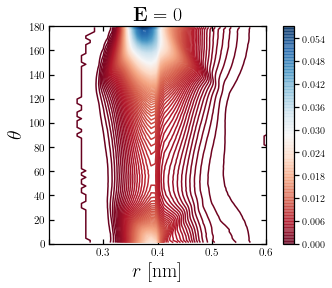

In [10]:
fig, axs = plt.subplots(1,1, sharex='col', sharey='row')

ax=axs
c=ax.contour(new_rad0, ang0, chunked_list0, 150, cmap='RdBu', origin='lower')
#ax.set_title('E=0')
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.set_aspect(0.5/ax.get_data_ratio())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0.2,0.6,0,180)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],100)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])

#fig.colorbar(c,ax=ax,pad=0.2)
#fig.tight_layout(h_pad=2)

fig.colorbar(c,ax=ax,pad=0.05)


xticks = ax.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)
yticks = ax.xaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)

ax.set_ylabel(r'$\theta$', fontsize=axislabelsize) # Y label
ax.set_xlabel(r'$r_{\rm}$ [nm]', fontsize=axislabelsize) # X label
ax.set_title(r'$\mathbf{E}=0$',fontsize=axislabelsize)

#plt.savefig("cdf_test.png",bbox_inches='tight',dpi=600)

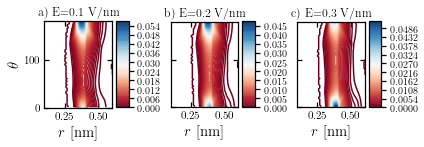

In [23]:
fig, axs = plt.subplots(1,3, sharex='col', sharey='row')

ax=axs[0]
c=ax.contour(new_rad1, ang1, chunked_list1, 100, cmap='RdBu', origin='lower')
ax.set_title('a) E=0.1\;V/nm',fontweight="bold")
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.set_aspect(0.8/ax.get_data_ratio())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0.1,0.6,0,180)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],100)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
fig.colorbar(c,ax=ax,pad=0.05,aspect=6.8)

ax=axs[1]
c=ax.contour(new_rad2, ang2, chunked_list2, 100, cmap='RdBu', origin='lower')
ax.set_title('b) E=0.2\;V/nm')
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.set_aspect(0.8/ax.get_data_ratio())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0.1,0.6,0,180)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],100)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
fig.colorbar(c,ax=ax,pad=0.05,aspect=6.8)

ax=axs[2]
c=ax.contour(new_rad3, ang3, chunked_list3, 100, cmap='RdBu', origin='lower')
ax.set_title('c) E=0.3\;V/nm')
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.set_aspect(0.8/ax.get_data_ratio())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
fig.colorbar(c,ax=ax,pad=0.05,aspect=6.8)

#ax=axs[3]
#c=ax.contour(new_rad4, ang4, chunked_list4, 100, cmap='RdBu', origin='lower')
#ax.set_title('E=0.4\;V/nm')
#ax.get_yaxis().set_tick_params(which='both', direction='in')
#ax.get_xaxis().set_tick_params(which='both', direction='in')
#ax.set_aspect(0.8/ax.get_data_ratio())
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
#ax.xaxis.set_tick_params(labelsize=ticklabelsize)
#ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0.1,0.6,0,180)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],100)

#ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
#ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
#fig.colorbar(c,ax=ax,pad=0.05,aspect=6.75)


axs[0].set_ylabel(r'$\theta$', fontsize=0.75*axislabelsize) # Y label
axs[0].set_xlabel(r'$r_{\rm}$ [nm]', fontsize=0.75*axislabelsize) # X label
axs[1].set_xlabel(r'$r_{\rm}$ [nm]', fontsize=0.75*axislabelsize) # X label
axs[2].set_xlabel(r'$r_{\rm}$ [nm]', fontsize=0.75*axislabelsize) # X label
#axs[3].set_xlabel(r'$r_{\rm}$ [nm]', fontsize=axislabelsize) # X label


fig.tight_layout(h_pad=2)
#plt.savefig("cdf_ccn_orient_lst5nsfrom_100ns_0-0.4_new_V_nm_fnl.png",bbox_inches='tight',dpi=600)

plt.savefig("cdf_high_electric_fields_lst25nsof100ns_normwith50000.png",bbox_inches='tight',dpi=600)

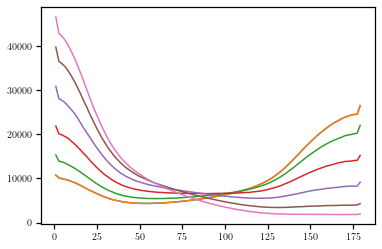

In [13]:
res=[]
for i in range(len(chunked_list0)):
    res.append([i,np.sum(chunked_list0[i])])
x0,y0=np.array(res).T
plt.plot(ang4,y0)

res=[]
for i in range(len(chunked_list1)):
    res.append([i,np.sum(chunked_list1[i])])
x01,y01=np.array(res).T
plt.plot(ang4,y01)

res=[]
for i in range(len(chunked_list2)):
    res.append([i,np.sum(chunked_list2[i])])
x02,y02=np.array(res).T
plt.plot(ang4,y02)

res=[]
for i in range(len(chunked_list3)):
    res.append([i,np.sum(chunked_list3[i])])
x03,y03=np.array(res).T
plt.plot(ang4,y03)

res=[]
for i in range(len(chunked_list4)):
    res.append([i,np.sum(chunked_list4[i])])
x04,y04=np.array(res).T
plt.plot(ang4,y04)

res=[]
for i in range(len(chunked_list5)):
    res.append([i,np.sum(chunked_list5[i])])
x05,y05=np.array(res).T
plt.plot(ang5,y05)

res=[]
for i in range(len(chunked_list6)):
    res.append([i,np.sum(chunked_list6[i])])
x06,y06=np.array(res).T
plt.plot(ang6,y06)

data_theta0=np.array([[0,y0[0]],[0.1,y01[0]],[0.2,y02[0]],[0.3,y03[0]],[0.4,y04[0]],[0.5,y05[0]],[0.6,y06[0]]])
data_theta180=np.array([[0,y0[99]],[0.1,y01[99]],[0.2,y02[99]],[0.3,y03[99]],[0.4,y04[99]],[0.5,y05[99]],[0.6,y06[99]]])

In [77]:
y00

array([10272.68045513,  9239.56739094,  9367.4506813 ,  9188.89540415,
        8958.6205617 ,  8770.38512729,  8451.26459242,  8176.27483058,
        7806.3443751 ,  7493.28084667,  7216.97177631,  6871.83734209,
        6590.25311842,  6272.04083887,  5956.48279642,  5671.84119512,
        5409.97655058,  5125.55462997,  4949.35297943,  4825.98386885,
        4658.13716681,  4513.29718608,  4424.21189609,  4338.6527698 ,
        4226.1095855 ,  4163.26412651,  4146.8560941 ,  4099.98985831,
        4109.21660444,  4092.76842475,  4105.68439028,  4131.31883134,
        4140.20234646,  4183.61296895,  4241.60692796,  4293.68661769,
        4339.54120722,  4369.84013687,  4435.94458814,  4516.66429524,
        4584.73065743,  4629.73583925,  4725.5988746 ,  4788.47195391,
        4869.78097629,  4973.45448272,  5051.64464932,  5205.45405013,
        5261.21242385,  5372.73359488,  5497.11820087,  5634.54606086,
        5772.09834001,  5886.03119681,  6019.47159262,  6194.90229309,
      

In [14]:
E, strng0 = data_theta0.T
E, strng180 = data_theta180.T

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


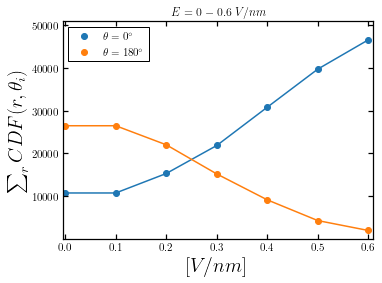

In [15]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')

ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (-0.005,0.61,50,51000)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.7/ax.get_data_ratio())

#plt.plot([0, 1.73])
#plt.vlines(0.3, 0, 1.0, colors = ("blue"),
#         linestyles = "dotted")
ax.scatter(E,strng0, label=r'$\theta=0^{\circ}$')
ax.plot(E,strng0)#, label=r'$\langle P_{x}\rangle$')
ax.scatter(E,strng180, label=r'$\theta=180^{\circ}$')
ax.plot(E,strng180)#, label=r'$\langle P_{x}\rangle$')



plt.title(r'$E=0-0.6\;V/nm$')
plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)


plt.ylabel(r'$\sum_{r}CDF{(r,\theta_{i})}$', fontsize=axislabelsize) # Y label
plt.xlabel(r'$[V/nm]$',fontsize=axislabelsize)
#plt.savefig("ccn_orient_lst5ns_0-0.4_V_nm.pdf",bbox_inches='tight')

xticks = ax.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)
yticks = ax.xaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)

plt.show()

In [16]:
datacdf001=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.01.csv',delimiter=';',usecols=range(3))
datacdf002=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.02.csv',delimiter=';',usecols=range(3))
datacdf003=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.03.csv',delimiter=';',usecols=range(3))
datacdf004=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.04.csv',delimiter=';',usecols=range(3))
datacdf005=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.05.csv',delimiter=';',usecols=range(3))
datacdf006=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.06.csv',delimiter=';',usecols=range(3))
datacdf007=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.07.csv',delimiter=';',usecols=range(3))
datacdf008=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.08.csv',delimiter=';',usecols=range(3))
datacdf009=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/cdf_100ns/fields_0.01-0.09/0.09.csv',delimiter=';',usecols=range(3))

In [17]:
x0, y0, z0 = datacdf001.T
rad0=np.unique(x0)
new_rad0=rad0/1000
ang0=np.unique(y0)
chunk_size = 100
chunked_list0 = [z0[i:i+chunk_size] for i in range(0, len(z0), chunk_size)]

x1, y1, z1 = datacdf002.T
rad1=np.unique(x1)
new_rad1=rad1/1000
ang1=np.unique(y1)
chunk_size = 100
chunked_list1 = [z1[i:i+chunk_size] for i in range(0, len(z1), chunk_size)]

x2, y2, z2 = datacdf003.T
rad2=np.unique(x2)
new_rad2=rad0/1000
ang2=np.unique(y2)
chunk_size = 100
chunked_list2 = [z2[i:i+chunk_size] for i in range(0, len(z2), chunk_size)]
                
x3, y3, z3 = datacdf004.T
rad3=np.unique(x3)
new_rad3=rad3/1000
ang3=np.unique(y3)
chunk_size = 100
chunked_list3 = [z3[i:i+chunk_size] for i in range(0, len(z3), chunk_size)]
                
x4, y4, z4 = datacdf005.T
rad4=np.unique(x4)
new_rad4=rad4/1000
ang4=np.unique(y4)
chunk_size = 100
chunked_list4 = [z4[i:i+chunk_size] for i in range(0, len(z4), chunk_size)]
                
x5, y5, z5 = datacdf006.T
rad5=np.unique(x5)
new_rad5=rad5/1000
ang5=np.unique(y5)
chunk_size = 100
chunked_list5 = [z5[i:i+chunk_size] for i in range(0, len(z5), chunk_size)]
                
x6, y6, z6 = datacdf007.T
rad6=np.unique(x6)
new_rad6=rad6/1000
ang6=np.unique(y6)
chunk_size = 100
chunked_list6 = [z6[i:i+chunk_size] for i in range(0, len(z6), chunk_size)]
                
x7, y7, z7 = datacdf008.T
rad7=np.unique(x7)
new_rad7=rad7/1000
ang7=np.unique(y7)
chunk_size = 100
chunked_list7 = [z7[i:i+chunk_size] for i in range(0, len(z7), chunk_size)]
                
x8, y8, z8 = datacdf009.T
rad8=np.unique(x8)
new_rad8=rad8/1000
ang8=np.unique(y8)
chunk_size = 100
chunked_list8 = [z8[i:i+chunk_size] for i in range(0, len(z8), chunk_size)]

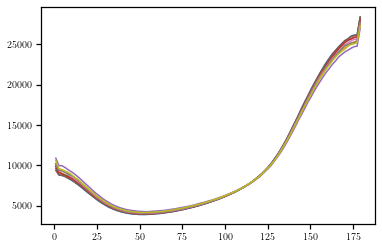

In [18]:
res=[]
for i in range(len(chunked_list0)):
    res.append([i,np.sum(chunked_list0[i])])
x00,y00=np.array(res).T
plt.plot(ang4,y00)

res=[]
for i in range(len(chunked_list1)):
    res.append([i,np.sum(chunked_list1[i])])
x001,y001=np.array(res).T
plt.plot(ang4,y001)

res=[]
for i in range(len(chunked_list2)):
    res.append([i,np.sum(chunked_list2[i])])
x002,y002=np.array(res).T
plt.plot(ang4,y002)

res=[]
for i in range(len(chunked_list3)):
    res.append([i,np.sum(chunked_list3[i])])
x003,y003=np.array(res).T
plt.plot(ang4,y003)

res=[]
for i in range(len(chunked_list4)):
    res.append([i,np.sum(chunked_list4[i])])
x004,y004=np.array(res).T
plt.plot(ang4,y004)

res=[]
for i in range(len(chunked_list5)):
    res.append([i,np.sum(chunked_list5[i])])
x005,y005=np.array(res).T
plt.plot(ang5,y005)

res=[]
for i in range(len(chunked_list6)):
    res.append([i,np.sum(chunked_list6[i])])
x006,y006=np.array(res).T
plt.plot(ang6,y006)

res=[]
for i in range(len(chunked_list7)):
    res.append([i,np.sum(chunked_list7[i])])
x007,y007=np.array(res).T
plt.plot(ang7,y007)

res=[]
for i in range(len(chunked_list8)):
    res.append([i,np.sum(chunked_list8[i])])
x008,y008=np.array(res).T
plt.plot(ang8,y008)

data_theta0=np.array([[0.01,y00[0]],[0.02,y001[0]],[0.03,y002[0]],[0.04,y003[0]],[0.05,y004[0]],[0.06,y005[0]],[0.07,y006[0]],[0.08,y007[0]],[0.09,y008[0]]])
data_theta180=np.array([[0.01,y00[99]],[0.02,y001[99]],[0.03,y002[99]],[0.04,y003[99]],[0.05,y004[99]],[0.06,y005[99]],[0.07,y006[99]],[0.08,y007[99]],[0.09,y008[99]]])

In [19]:
E, strng0 = data_theta0.T
E, strng180 = data_theta180.T

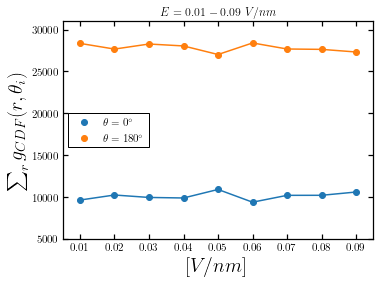

In [20]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')

ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0.005,0.095,5000,31000)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.7/ax.get_data_ratio())

#plt.plot([0, 1.73])
#plt.vlines(0.3, 0, 1.0, colors = ("blue"),
#         linestyles = "dotted")
ax.scatter(E,strng0, label=r'$\theta=0^{\circ}$')
ax.plot(E,strng0)#, label=r'$\langle P_{x}\rangle$')
ax.scatter(E,strng180, label=r'$\theta=180^{\circ}$')
ax.plot(E,strng180)#, label=r'$\langle P_{x}\rangle$')



plt.title(r'$E=0.01-0.09\;V/nm$')
plt.legend(loc='center left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)


plt.ylabel(r'$\sum_{r}g_{CDF}{(r,\theta_{i})}$', fontsize=axislabelsize) # Y label
plt.xlabel(r'$[V/nm]$',fontsize=axislabelsize)
#plt.savefig("ccn_orient_lst5ns_0-0.4_V_nm.pdf",bbox_inches='tight')

xticks = ax.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)
yticks = ax.xaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)

plt.show()

In [23]:
data_theta0_fnl=np.array([[0.0,y00[0]],[0.01,y00[0]],[0.02,y001[0]],[0.03,y002[0]],[0.04,y003[0]],[0.05,y004[0]],[0.06,y005[0]],[0.07,y006[0]],[0.08,y007[0]],[0.09,y008[0]],[0.1,y01[0]],[0.2,y02[0]],[0.3,y03[0]],[0.4,y04[0]],[0.5,y05[0]],[0.6,y06[0]]])
data_theta180_fnl=np.array([[0.0,y00[99]],[0.01,y00[99]],[0.02,y001[99]],[0.03,y002[99]],[0.04,y003[99]],[0.05,y004[99]],[0.06,y005[99]],[0.07,y006[99]],[0.08,y007[99]],[0.09,y008[99]],[0.1,y01[99]],[0.2,y02[99]],[0.3,y03[99]],[0.4,y04[99]],[0.5,y05[99]],[0.6,y06[99]]])

In [24]:
y0[99]

0.9

In [25]:
E_fnl, strng0_fnl = data_theta0_fnl.T
E_fnl, strng180_fnl = data_theta180_fnl.T

In [26]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

<ipython-input-26-46fdb3bd2387>:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


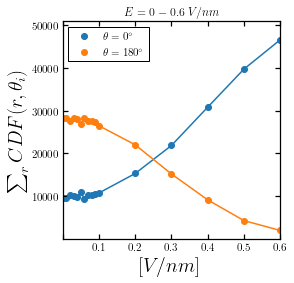

In [27]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')

ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,0.6,50,51000)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1.0/ax.get_data_ratio())

#plt.plot([0, 1.73])
#plt.vlines(0.3, 0, 1.0, colors = ("blue"),
#         linestyles = "dotted")
ax.scatter(E_fnl,strng0_fnl, label=r'$\theta=0^{\circ}$')
ax.plot(E_fnl,strng0_fnl)#, label=r'$\langle P_{x}\rangle$')
ax.scatter(E_fnl,strng180_fnl, label=r'$\theta=180^{\circ}$')
ax.plot(E_fnl,strng180_fnl)#, label=r'$\langle P_{x}\rangle$')

plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)

plt.title(r'$E=0-0.6\;V/nm$')
plt.ylabel(r'$\sum_{r}CDF{(r,\theta_{i})}$', fontsize=axislabelsize) # Y label
plt.xlabel(r'$[V/nm]$',fontsize=axislabelsize)
#plt.savefig("ccn_orient_lst5ns_0-0.4_V_nm_fnl.pdf",bbox_inches='tight')

xticks = ax.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)
yticks = ax.xaxis.get_major_ticks() 
yticks[0].label1.set_visible(False)

plt.show()

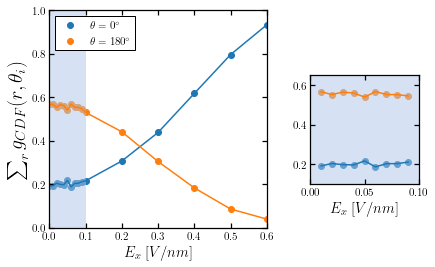

In [132]:
fig, ax1 = plt.subplots()
#T_E = np.arange(1,max(T)+1,1)
# The data.
ax1.get_yaxis().set_tick_params(which='both', direction='in')
ax1.get_xaxis().set_tick_params(which='both', direction='in')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(labelsize=ticklabelsize)
ax1.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,0.6,0,1)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax1.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax1.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax1.set_aspect(1.0/ax1.get_data_ratio())

#plt.plot([0, 1.73])
#plt.vlines(0.3, 0, 1.0, colors = ("blue"),
#         linestyles = "dotted")
ax1.scatter(E_fnl,strng0_fnl/50001, label=r'$\theta=0^{\circ}$')
ax1.plot(E_fnl,strng0_fnl/50001)#, label=r'$\langle P_{x}\rangle$')
ax1.scatter(E_fnl,strng180_fnl/50001, label=r'$\theta=180^{\circ}$')
ax1.plot(E_fnl,strng180_fnl/50001)#, label=r'$\langle P_{x}\rangle$')

ax1.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=legendlabelsize)


# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,1,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [1.2,0.2,0.5,0.5])
ax2.set_axes_locator(ip)
ax2.set_aspect(1.0/ax2.get_data_ratio())

# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
#mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.1')
#mark_inset(ax1, ax2, loc1=1, loc2=1, fc="none", ec='0.1')

ax2.get_yaxis().set_tick_params(which='both', direction='in')
ax2.get_xaxis().set_tick_params(which='both', direction='in')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.xaxis.set_tick_params(labelsize=ticklabelsize)
ax2.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,0.1,0.1,0.65)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax2.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax2.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax2.set_aspect(1.0/ax2.get_data_ratio())

#plt.plot([0, 1.73])
#plt.vlines(0.3, 0, 1.0, colors = ("blue"),
#         linestyles = "dotted")
ax2.scatter(E,strng0/50001, label=r'$\theta=0^{\circ}$')
ax2.plot(E,strng0/50001)#, label=r'$\langle P_{x}\rangle$')
ax2.scatter(E,strng180/50001, label=r'$\theta=180^{\circ}$')
ax2.plot(E,strng180/50001)#, label=r'$\langle P_{x}\rangle$')
ax2.set_xlabel(r'$E_{x}\;[V/nm]$',fontsize=0.75*axislabelsize)


#ax2.legend(loc='center left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)

#ax1.set_title(r'$E=0-0.4\;V/nm$')
ax1.set_ylabel(r'$\sum_{r}g_{CDF}{(r,\theta_{i})}$', fontsize=axislabelsize) # Y label
ax1.set_xlabel(r'$E_{x}\;[V/nm]$',fontsize=0.75*axislabelsize)

#ax2.set_xlabel(r'$[V/nm]$',fontsize=axislabelsize)

ax1.axvspan(0, 0.1, facecolor=tableau20[1], alpha=0.5, label='acyclic contribution')
ax2.axvspan(0, 0.1, facecolor=tableau20[1], alpha=0.5, label='acyclic contribution')


#plt.savefig("cdf_ccn_orient_lst25nsof100ns_0-0.4_new_V_nm_fnl.png",bbox_inches='tight',dpi=600)


plt.show()

In [24]:
pwd

'/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/jupyternb'